--2020-12-08 03:42:08--  https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving uta.instructure.com (uta.instructure.com)... 52.21.165.220, 54.145.38.170, 34.224.181.213
Connecting to uta.instructure.com (uta.instructure.com)|52.21.165.220|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps [following]
--2020-12-08 03:42:08--  https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving a13430-10505095.cluster38.canvas-user-content.com (a13430-10505095.cluster38.canvas-user-content.com)... 52.22.206.196, 3.

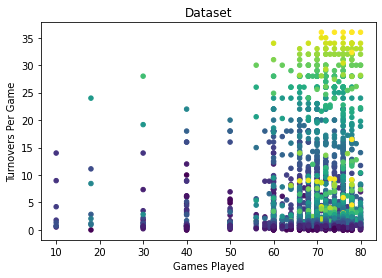

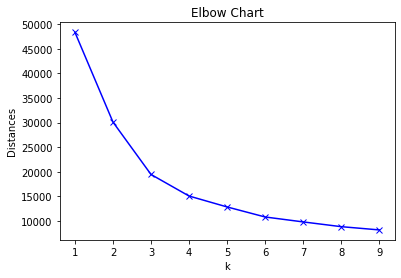

                       Cluster ID
Player                           
James Harden                    0
Giannis Antetokounmpo           0
Stephen Curry                   0
Karl-Anthony Towns              0
Anthony Davis                   0
...                           ...
Chris Boucher                   2
Richaun Holmes                  2
Jusuf Nurkic                    2
Jordan McRae                    2
DeMarcus Cousins                2

[300 rows x 1 columns]
   Games Played  Minutes Per Game  ...  Block Per Game  Turnover Per Game
0     73.822581         32.870968  ...        0.812935           2.510210
1     66.530000         19.910000  ...        0.518340           1.039270
2     37.714286         17.571429  ...        0.628429           0.978500
3     72.854839         27.524194  ...        0.661645           1.510944

[4 rows x 9 columns]


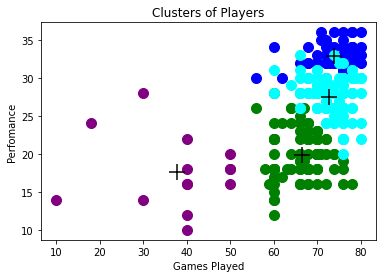

In [261]:
!wget -O 2018-2019_NBA_Stats.csv https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import cluster
from sklearn.cluster import KMeans


#Read from the csv file and return a Pandas DataFrame.
stats_file = '/content/2018-2019_NBA_Stats.csv'
nba = pd.read_csv(io.FileIO(stats_file))
nba

#pass the value from column 3 through 12 
frame=nba.iloc[:,3:12].values

#plot the points from the dataset
plt.title('Dataset')  
ax  = plt.gca()
columns = nba.columns
for col in columns[4:]:
    nba.plot.scatter(x=columns[3], y=col, c=col, colormap='viridis',
        ax=ax, colorbar=False)
plt.show()

#drop the columns that are not numeric
data = nba.drop('Position',axis =1 )
data = nba.drop('Team',axis =1 )
data = nba.drop('Player',axis =1 )

#compute the squared distances between points 
distances = []
points = range(1,10)
for k in points:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(frame)
    distances.append(kmeans.inertia_)

#plot the Elbow Chart
plt.plot(points, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distances')
plt.title('Elbow Chart')
plt.show()

#assign k with optimal value according to Elbow Chart 
k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
k = k_means.fit_predict(frame) 
labels = k_means.labels_
pd.DataFrame(labels, index=nba.Player, columns=['Cluster ID'])

#print the clustered data
print (pd.DataFrame(labels, index=nba.Player, columns=['Cluster ID']))

#compute the centroids
centroids = k_means.cluster_centers_
print (pd.DataFrame(centroids,columns=['Games Played','Minutes Per Game', 'Points Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Three Points Made Per Game', 'Steals Per Game','Block Per Game', 'Turnover Per Game']))

#plot the clusters 
plt.scatter(frame[k==0, 0], frame[k==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(frame[k==1, 0], frame[k==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(frame[k==2, 0], frame[k==2, 1], s=100, c='purple', label ='Cluster 3')
plt.scatter(frame[k==3, 0], frame[k==3, 1], s=100, c='cyan', label ='Cluster 4')

#plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, marker='+', c='black', edgecolor='black', label='Centroids')
plt.title('Clusters of Players')
plt.xlabel('Games Played')
plt.ylabel('Perfomance')
plt.show()










